In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("weight-height.csv")

In [3]:
pd.pandas.set_option("display.max_rows",None)

In [4]:
df.head(15)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [5]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
df['Gender'].value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

In [7]:
df.shape

(10000, 3)

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [9]:
df['Gender'] = le.fit_transform(df['Gender'])

In [10]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [11]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

In [12]:
df['Height'] = sc.fit_transform(df[['Height']])
df['Weight'] = sc.fit_transform(df[['Weight']])

In [13]:
df.head()

,Gender,Height,Weight
0,1,0.791728,0.863139
1,1,0.586958,0.475476
2,1,0.802364,0.721131
3,1,0.706182,0.756699
4,1,0.631424,0.689999


In [14]:
corr_matrix = df.corr()   #it makes the correlation matrix
corr_matrix['Height'].sort_values(ascending=False)


Height    1.000000
Weight    0.924756
Gender    0.691072
Name: Height, dtype: float64

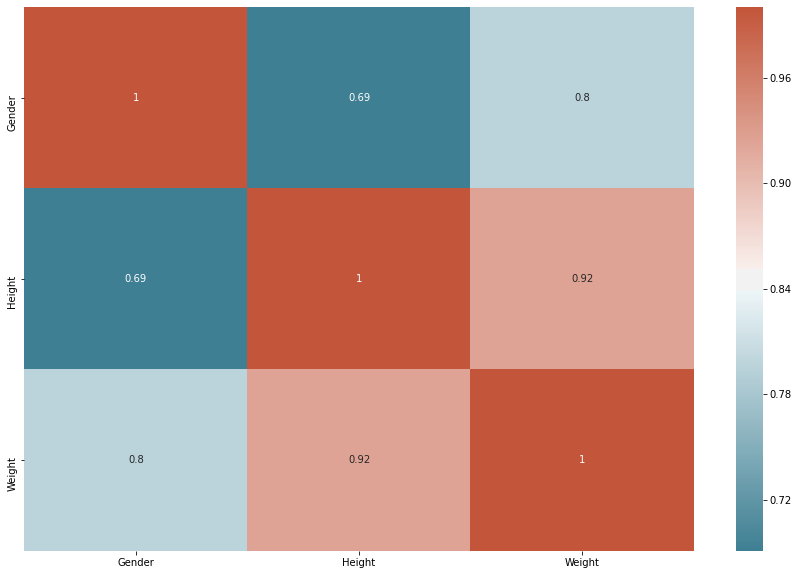

In [15]:
import seaborn as sns
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns,    
yticklabels=corr.columns, annot=True,  
cmap=sns.diverging_palette(220, 20, as_cmap=True))



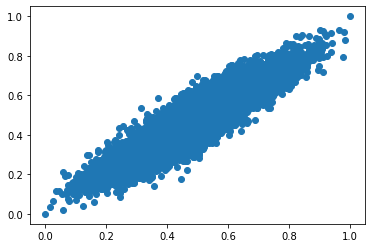

In [16]:
plt.scatter(df['Height'],df['Weight'])

In [17]:
X = df.drop('Height',axis=1)
y = df['Height']

In [18]:
X.head()

,Gender,Weight
0,1,0.863139
1,1,0.475476
2,1,0.721131
3,1,0.756699
4,1,0.689999


In [19]:
y.head()

0    0.791728
1    0.586958
2    0.802364
3    0.706182
4    0.631424
Name: Height, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_train.head()

,Gender,Weight
9254,0,0.272697
1561,1,0.704726
1670,1,0.663342
6087,0,0.339241
6669,0,0.465201


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

score_list =[]
mse_list = []

In [23]:
LR_score = cross_val_score(LinearRegression(),X_train,y_train,cv=10) 
avg = np.average(LR_score)
score_list.append(avg)

LR_mse = cross_val_score(LinearRegression(),X_train,y_train,cv=10, scoring="neg_mean_squared_error")
LR_mean_mse = np.average(LR_mse)
print(LR_mean_mse)
mse_list.append(LR_mean_mse)


-0.0033726757813624165


In [24]:
DT_score = cross_val_score(DecisionTreeRegressor(),X_train,y_train,cv=10)
avg = np.average(DT_score) 
print(avg)
score_list.append(avg)

DT_mse = cross_val_score(DecisionTreeRegressor(),X_train,y_train,cv=10, scoring="neg_mean_squared_error")
DT_mean_mse = np.average(DT_mse)
print(DT_mean_mse)
mse_list.append(DT_mean_mse)


0.7265748129684628
-0.0065821270644653455


In [25]:
RF_score = cross_val_score(RandomForestRegressor(),X_train,y_train,cv=10)
avg = np.average(RF_score)
print(avg)
score_list.append(avg)

RF_mse = cross_val_score(DecisionTreeRegressor(),X_train,y_train,cv=10, scoring="neg_mean_squared_error")
RF_mean_mse = np.average(RF_mse)
print(RF_mean_mse)
mse_list.append(RF_mean_mse)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

0.7923692864460025
-0.006581135355682835


In [26]:
SVR_score = cross_val_score(SVR(kernel='linear',C=0.1),X_train,y_train,cv=10)
avg = np.average(SVR_score)
print(avg)
score_list.append(avg)

SVR_mse = cross_val_score(SVR(),X_train,y_train,cv=10, scoring="neg_mean_squared_error")
SVR_mean_mse = np.average(SVR_mse)
print(SVR_mean_mse)
mse_list.append(SVR_mean_mse)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

-0.0033863389970827224


In [27]:
mse_list


[-0.0033726757813624165,
 -0.0065821270644653455,
 -0.006581135355682835,
 -0.0033863389970827224]

In [28]:
score_list

[0.8598953741671924,
 0.7265748129684628,
 0.7923692864460025,
 0.8584730482330357]

In [29]:
# best model - Linear regressor

In [30]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred = model.predict(X_test)

In [32]:
model.score(X_test,y_test)

0.8621926450118506

hhi


C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


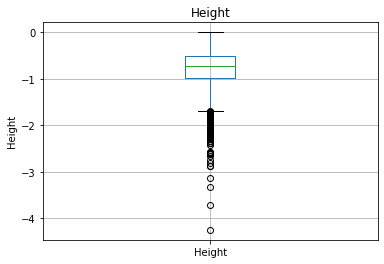

hhi


C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


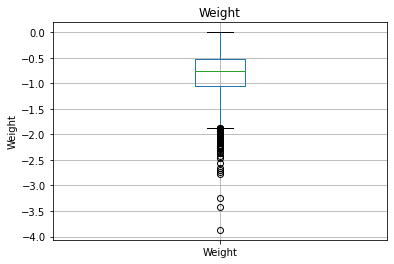

In [33]:
for feature in df.columns[1:]:
    data = df.copy()
    if 0 not in df[feature].unique():
        print("hi")
        pass
    else:
        print("hhi")
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()